In [4]:
!unzip data.zip

Archive:  data.zip
  inflating: creditcard.csv          


In [5]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/content/creditcard.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

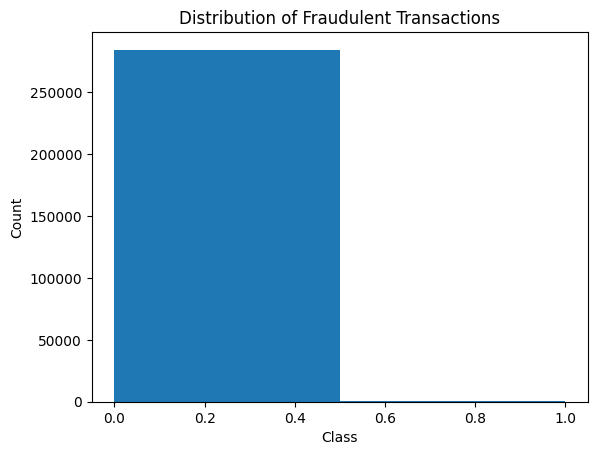

In [11]:
# Visualize the distribution of the target variable
plt.hist(df['Class'], bins=2)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent Transactions')
plt.show()

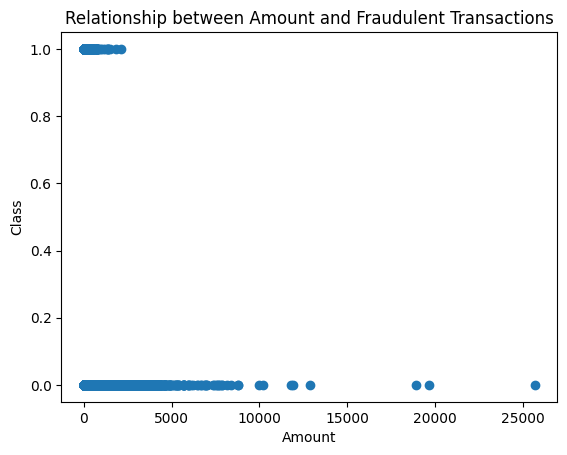

In [12]:
# Explore the relationship between features and the target variable
# Example: Scatter plot of 'Amount' vs 'Class'
plt.scatter(df['Amount'], df['Class'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.title('Relationship between Amount and Fraudulent Transactions')
plt.show()

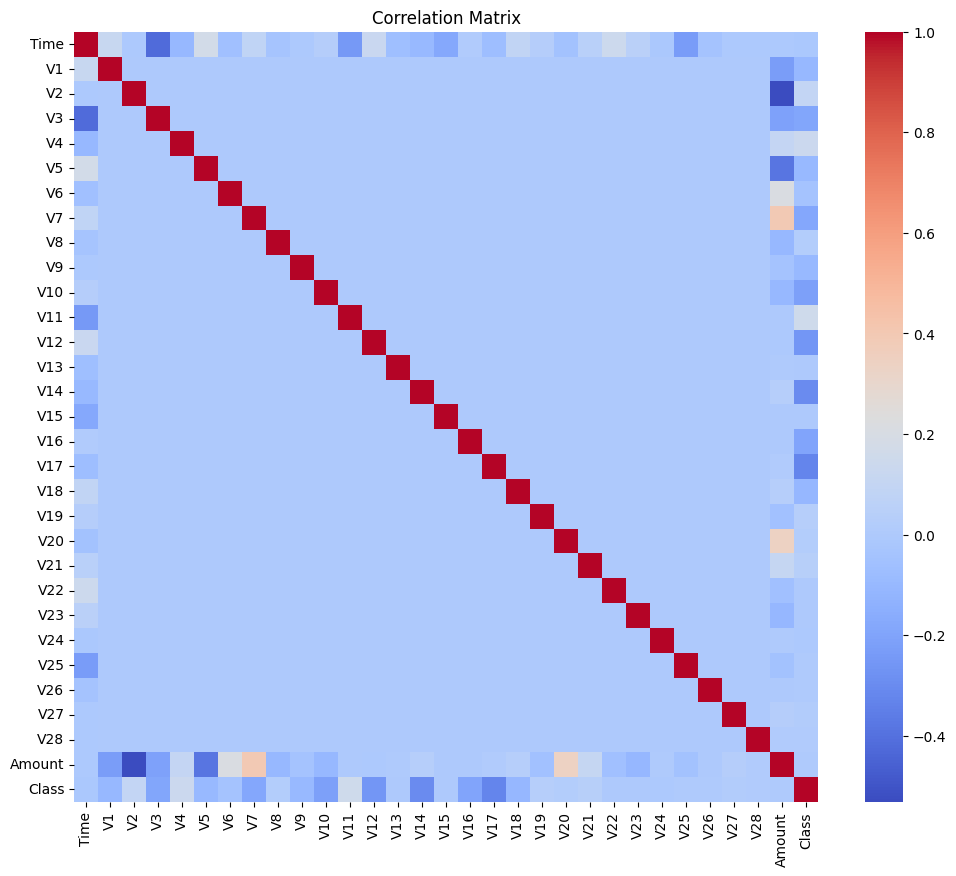

In [13]:
import seaborn as sns
# Calculate correlation matrix
corr_matrix = df.corr()
# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

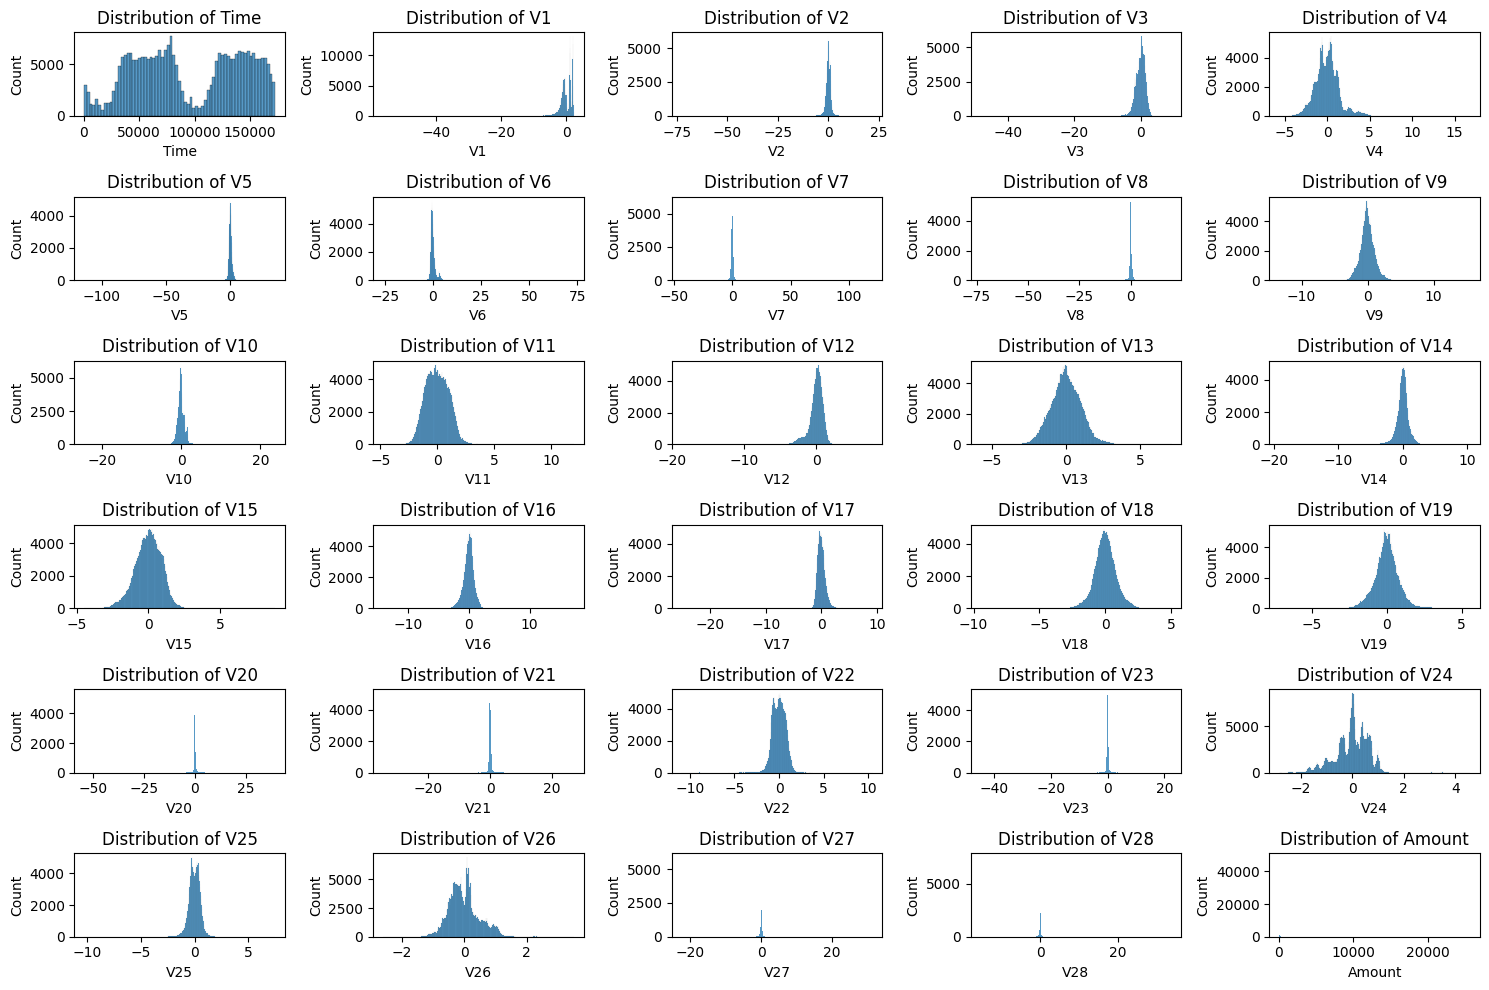

In [11]:
# Visualize feature distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
  plt.subplot(6, 5, i + 1)
  sns.histplot(df[col])
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df.isnull().sum().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 0


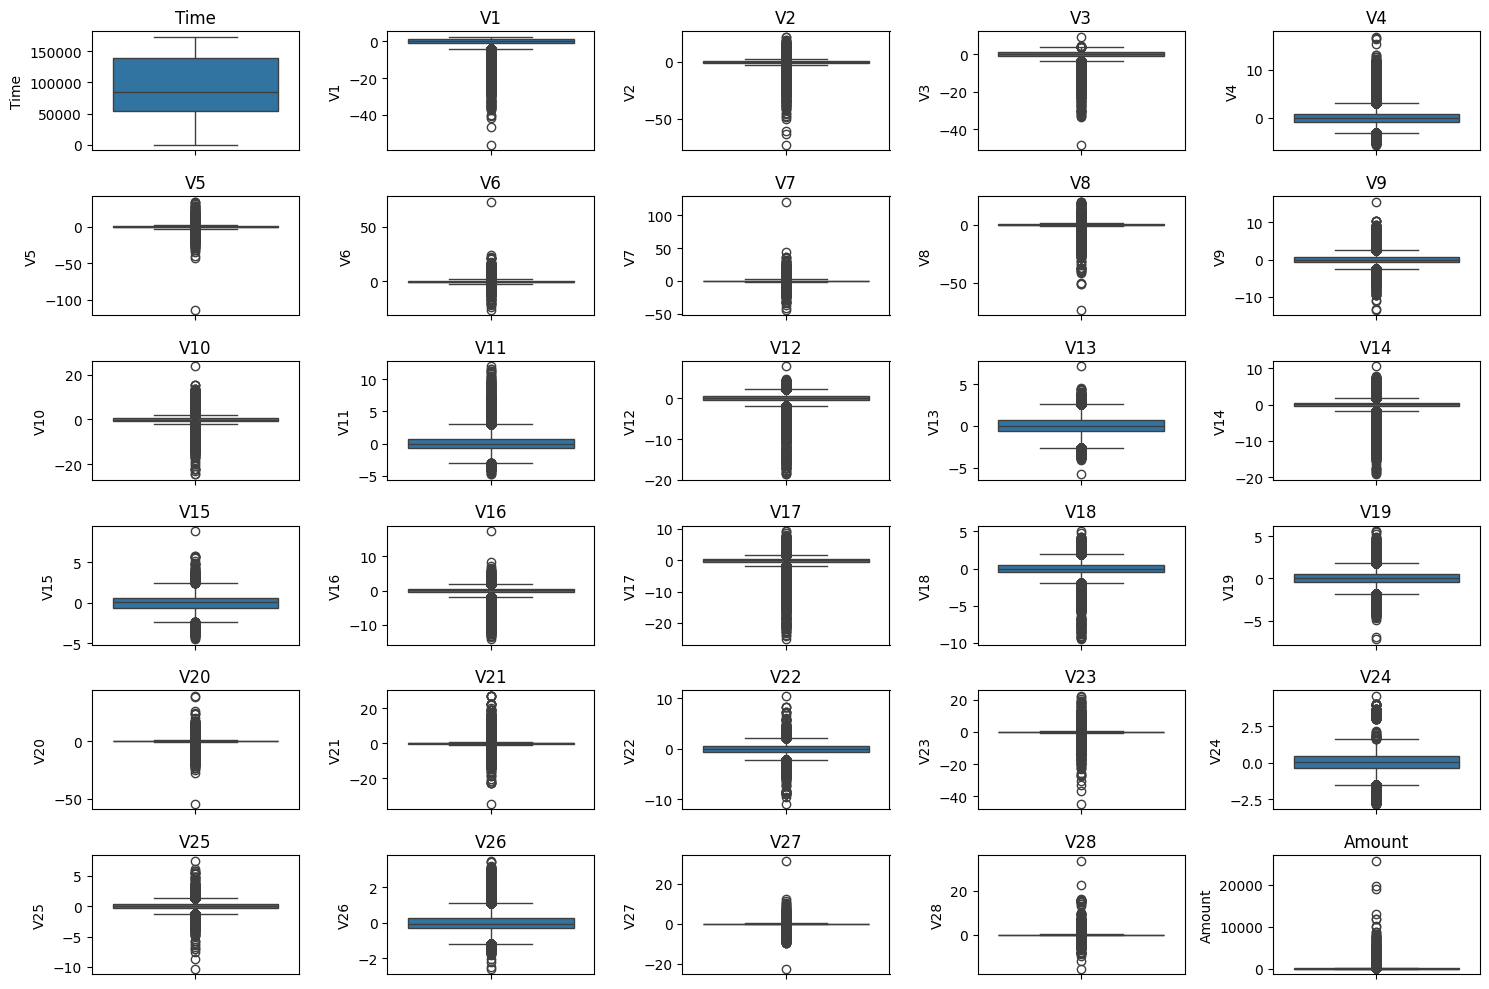

In [37]:
# Outlier detection using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
  plt.subplot(6, 5, i + 1)
  sns.boxplot(y=df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

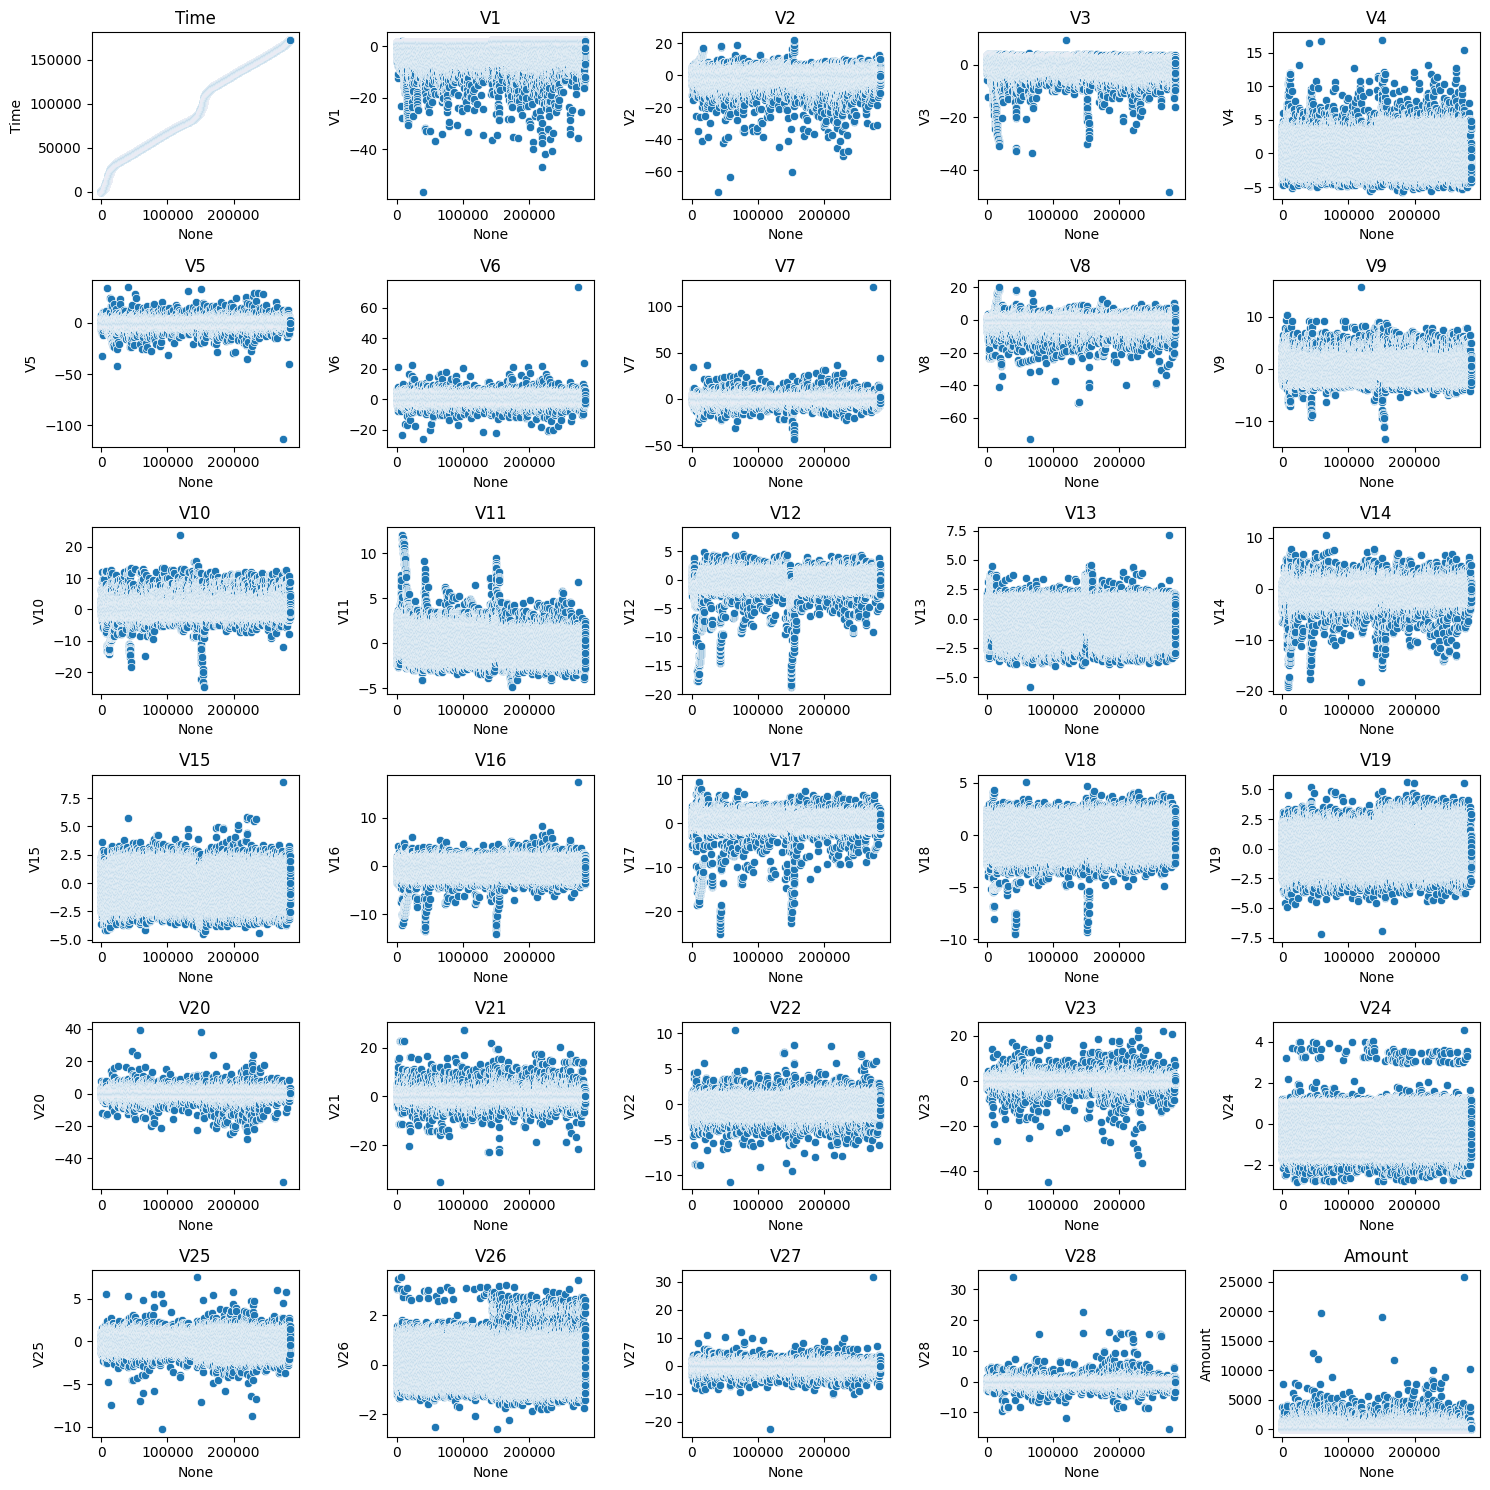

In [38]:
# Anomaly detection using scatter plots and histograms
fig, axes = plt.subplots(6, 5, figsize=(15, 15))
for i, col in enumerate(df.columns[:-1]):
  row = i // 5
  col_num = i % 5
  sns.scatterplot(x=df.index, y=df[col], ax=axes[row, col_num])
  axes[row, col_num].set_title(col)
plt.tight_layout()
plt.show()

In [16]:
import numpy as np
# Handle outliers using IQR method
for col in df.columns[:-1]:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = np.clip(df[col], lower_bound, upper_bound)

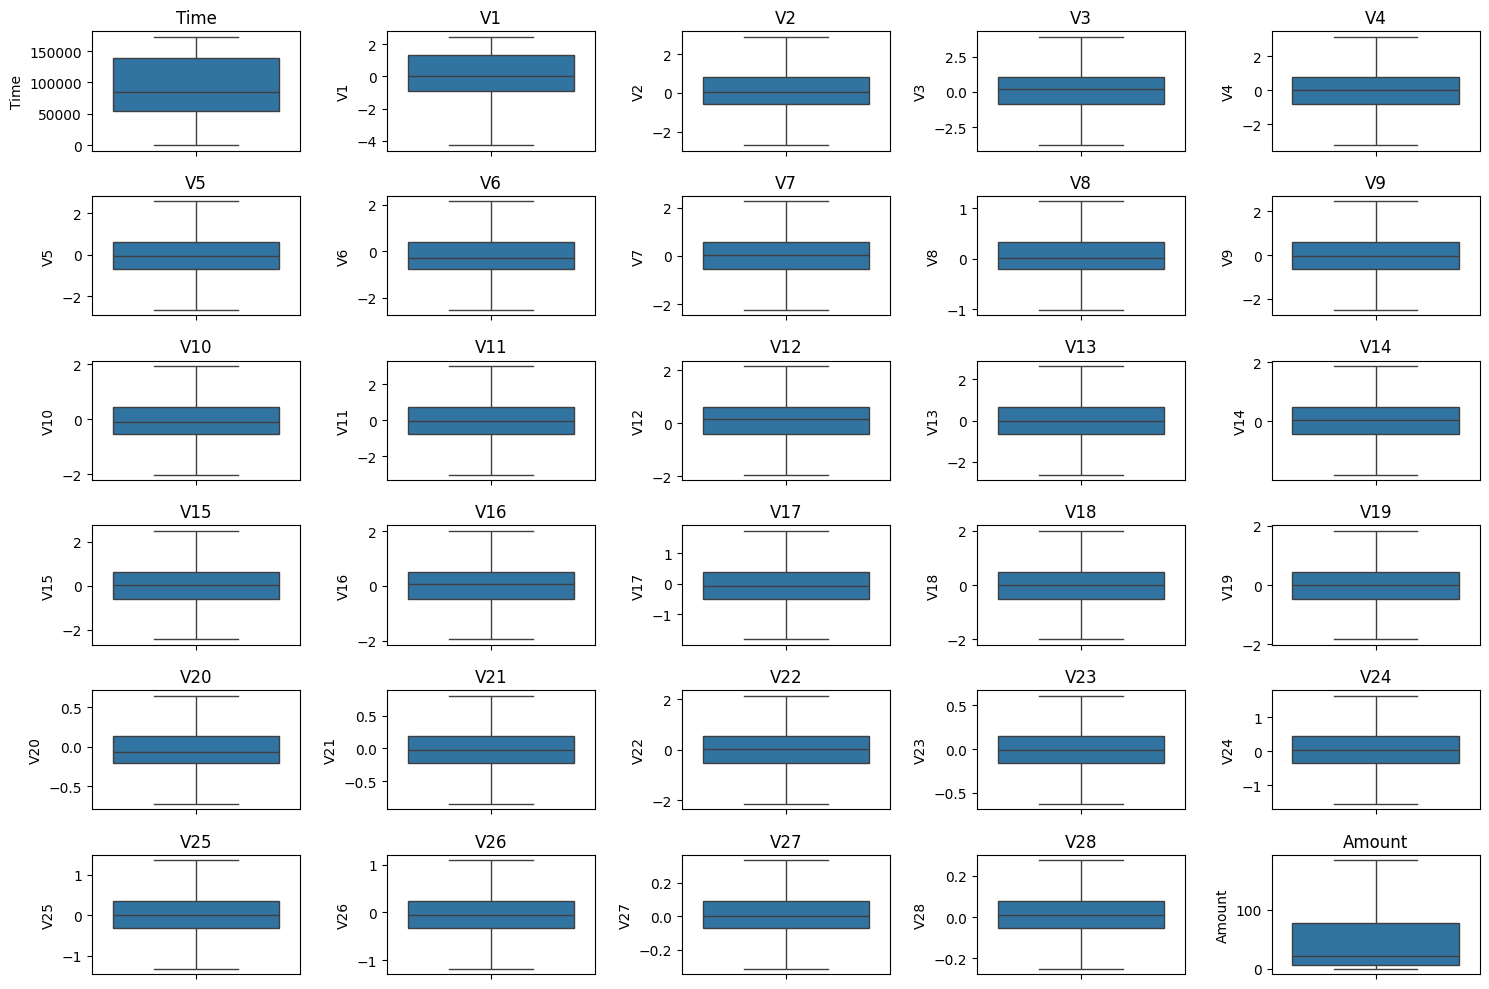

In [40]:
# Verify outlier handling using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
  plt.subplot(6, 5, i + 1)
  sns.boxplot(y=df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.6200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.6900,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.611875,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,184.5125,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.5000,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-4.274396,2.907135,-3.766705,-2.066656,-2.646882,-2.518586,-2.240844,1.131309,1.914428,...,0.213454,0.111864,0.611875,-0.509348,1.352506,0.250034,0.333872,0.275140,0.7700,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.7900,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.567212,2.148856,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.8800,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.0000,0


In [18]:
from sklearn.preprocessing import StandardScaler

# Select the features to scale (exclude the target variable 'Class')
features_to_scale = df.columns[:-1]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected features and transform them
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the scaled DataFrame
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.900025,-0.109510,1.831035,1.072714,-0.311553,0.551750,0.266800,0.062045,0.372361,...,-0.009783,0.390173,-0.396454,0.109061,0.253172,-0.395678,0.731878,-0.259015,1.587299,0
1,-1.996583,0.699998,0.192551,0.101661,0.363145,0.058235,0.008411,-0.101221,0.034047,-0.235690,...,-0.650218,-0.905468,0.396825,-0.575401,0.331544,0.277835,-0.130956,0.028789,-0.795094,0
2,-1.996562,-0.899113,-1.239020,1.274147,0.310977,-0.464612,1.886400,0.904662,0.368831,-1.472222,...,0.812274,1.088302,2.309528,-1.163379,-0.672290,-0.288735,-0.411641,-0.570321,2.153063,0
3,-1.996562,-0.653258,-0.209723,1.288584,-0.637457,-0.007051,1.334535,0.264500,0.636043,-1.346893,...,-0.287585,0.004858,-0.695567,-1.981645,1.305745,-0.465837,0.303095,0.404729,1.163777,0
4,-1.996541,-0.773627,0.737606,1.110328,0.328719,-0.375489,0.186232,0.675205,-0.698302,0.818132,...,0.017616,1.125905,-0.497539,0.234148,-0.425533,1.082601,1.251629,1.641107,0.296140,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-2.727619,2.546237,-2.768520,-1.555595,-2.454646,-2.421513,-2.600186,2.188475,1.895054,...,0.705640,0.155541,2.309528,-0.860615,2.736255,0.543255,1.944418,2.123658,-0.826226,0
284803,1.641952,-0.506852,-0.093735,1.465207,-0.542312,0.808517,1.146236,0.017984,0.466015,0.589391,...,0.707959,1.304176,0.064078,-1.713515,-1.238266,-0.836421,0.337899,-0.520249,-0.436754,0
284804,1.641974,1.156308,-0.313128,-2.391199,-0.404396,2.385724,2.233855,-0.353220,1.317624,0.439791,...,0.763028,0.814827,-0.123091,1.073569,0.531524,-0.178141,-0.049613,-0.303321,0.261928,0
284805,1.641974,-0.198125,0.428128,0.492821,0.547515,-0.348352,0.712653,-0.803249,1.257346,0.400151,...,0.865513,1.128407,-0.594338,0.203756,-1.162260,1.177481,0.582136,0.751240,-0.676566,0


In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (227845, 30)
X_test shape: (56962, 30)
y_train shape: (227845,)
y_test shape: (56962,)


   Feature  Importance
17     V17    0.146516
11     V11    0.096821
10     V10    0.074576
12     V12    0.072776
14     V14    0.054552
16     V16    0.050624
9       V9    0.049491
4       V4    0.047257
7       V7    0.043169
3       V3    0.037351
18     V18    0.033102
26     V26    0.024411
21     V21    0.023897
2       V2    0.020670
0     Time    0.019070
5       V5    0.017935
22     V22    0.017310
19     V19    0.017156
1       V1    0.016061
29  Amount    0.015633
15     V15    0.014819
24     V24    0.014487
13     V13    0.013645
6       V6    0.013444
25     V25    0.012306
27     V27    0.011988
20     V20    0.011059
8       V8    0.010678
23     V23    0.010043
28     V28    0.009153


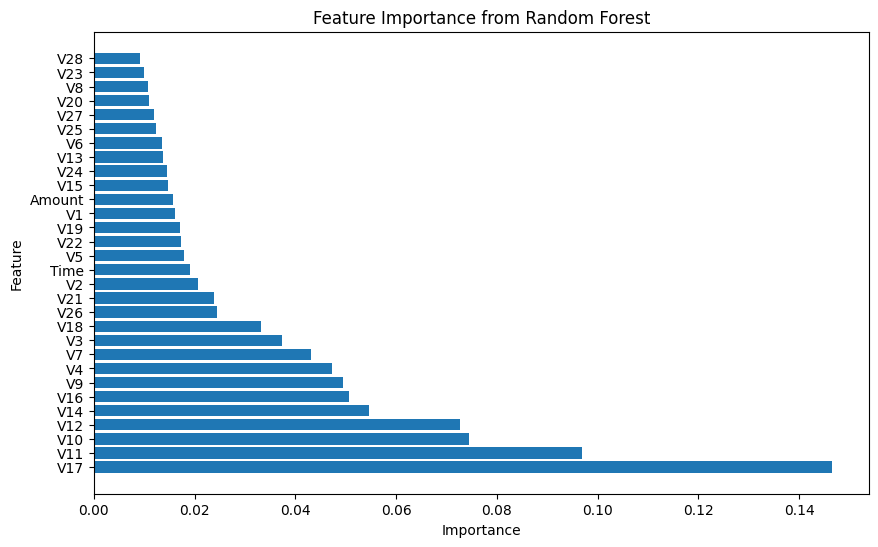

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print or visualize the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


In [22]:
# Identify features with importance lower than 0.02
low_importance_features = importance_df[importance_df['Importance'] < 0.02]['Feature'].tolist()
print(low_importance_features)

['Time', 'V5', 'V22', 'V19', 'V1', 'Amount', 'V15', 'V24', 'V13', 'V6', 'V25', 'V27', 'V20', 'V8', 'V23', 'V28']


In [23]:
# Identify features with importance lower than 0.02
low_importance_features = importance_df[importance_df['Importance'] < 0.02]['Feature'].tolist()

# Create new features based on interactions and combinations of low-importance features
for item in [X_train, X_test]:
  item['V5_V22_V13_V27_sum'] = item['V5'] - item['V22'] * item['V13'] - item['V27']
  item['V1_V19_V25_V28_diff'] = item['V1'] - item['V19'] * item['V25'] - item['V28']
  item['V6_Amount_V8_V20_prod'] = item['V6'] - item['Amount'] - item['V8'] - item['V20']
  item['V15_V24_V23'] = item['V15'] / (item['V24'] - item['V23'] - 1e-8)
  item['V1_V2'] = item['V1'] / (item['V2'] - 1e-8)
  item['V3_V4'] = item['V3'] - item['V4']
# ... add more new features as needed ...

                  Feature  Importance
17                    V17    0.148929
11                    V11    0.101755
35                  V3_V4    0.078766
10                    V10    0.077444
12                    V12    0.066028
16                    V16    0.056564
7                      V7    0.049238
4                      V4    0.034004
14                    V14    0.028461
3                      V3    0.027004
9                      V9    0.025371
32  V6_Amount_V8_V20_prod    0.021376
26                    V26    0.019447
18                    V18    0.015340
21                    V21    0.015156
31    V1_V19_V25_V28_diff    0.014689
2                      V2    0.013892
6                      V6    0.013817
34                  V1_V2    0.013780
19                    V19    0.013620
0                    Time    0.013131
29                 Amount    0.012509
22                    V22    0.012372
13                    V13    0.012235
33            V15_V24_V23    0.012221
1           

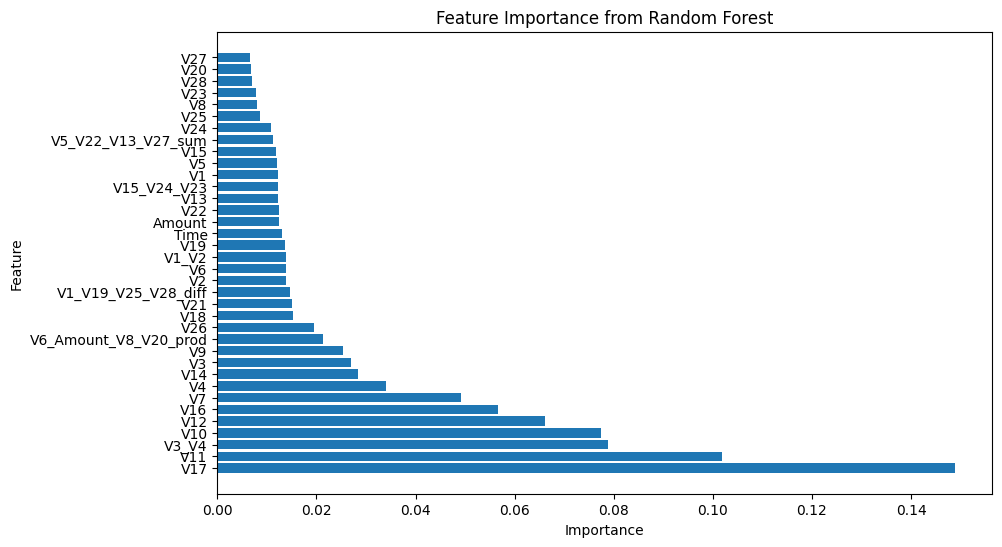

In [24]:
# Initialize a Random Forest Classifier
rf_model = RandomForestClassifier()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Print or visualize the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

In [29]:
important_features = importance_df[importance_df['Importance'] > 0.015]['Feature']
print(important_features)

17                      V17
11                      V11
35                    V3_V4
10                      V10
12                      V12
16                      V16
7                        V7
4                        V4
14                      V14
3                        V3
9                        V9
32    V6_Amount_V8_V20_prod
26                      V26
18                      V18
21                      V21
Name: Feature, dtype: object


In [30]:
# Filter features based on importance threshold
important_features = importance_df[importance_df['Importance'] > 0.015]['Feature']

# Select only important features for training and testing
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

print("Selected features for training:", X_train_selected.columns)
print("Selected features for testing:", X_test_selected.columns)

Selected features for training: Index(['V17', 'V11', 'V3_V4', 'V10', 'V12', 'V16', 'V7', 'V4', 'V14', 'V3',
       'V9', 'V6_Amount_V8_V20_prod', 'V26', 'V18', 'V21'],
      dtype='object')
Selected features for testing: Index(['V17', 'V11', 'V3_V4', 'V10', 'V12', 'V16', 'V7', 'V4', 'V14', 'V3',
       'V9', 'V6_Amount_V8_V20_prod', 'V26', 'V18', 'V21'],
      dtype='object')


Class
0    227451
1       394
Name: count, dtype: int64


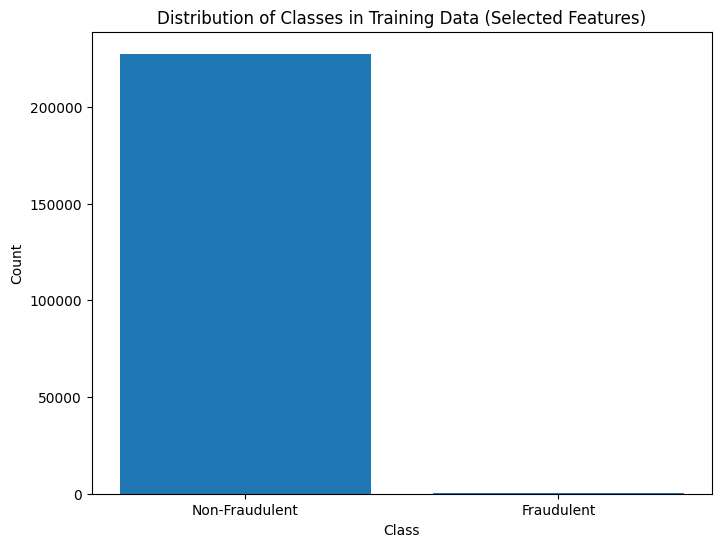

In [32]:
# Calculate the distribution of classes in X_train_selected
class_distribution = y_train.value_counts()
print(class_distribution)

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data (Selected Features)')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [33]:
# Check for NaN values in X_train_resampled
nan_count_train = X_train_selected.isna().sum().sum()
print("NaN values in X_train_resampled:", nan_count_train)

# Check for NaN values in X_test_selected
nan_count_test = X_test_selected.isna().sum().sum()
print("NaN values in X_test_selected:", nan_count_test)

NaN values in X_train_resampled: 0
NaN values in X_test_selected: 0


In [34]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Check the class distribution after oversampling
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Now you can use X_train_resampled and y_train_resampled for training your model

Class distribution after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


In [35]:
# Check for NaN values in X_train_resampled
nan_count_train = X_train_selected.isna().sum().sum()
print("NaN values in X_train_resampled:", nan_count_train)

# Check for NaN values in X_test_selected
nan_count_test = X_test_selected.isna().sum().sum()
print("NaN values in X_test_selected:", nan_count_test)

NaN values in X_train_resampled: 0
NaN values in X_test_selected: 0


In [36]:
# **Chosen Algorithms and Justification:**

# 1. **Logistic Regression:**
#    - **Justification:** A good baseline model for binary classification problems. It's simple, interpretable, and efficient to train. Since fraud detection is often imbalanced, we can adjust class weights or use techniques like oversampling to address this.

# 2. **Random Forest:**
#    - **Justification:** Handles high-dimensional data well and is less prone to overfitting than decision trees. It provides feature importance scores, helping us understand which factors contribute most to fraud detection.

# 3. **Gradient Boosting (XGBoost or LightGBM):**
#    - **Justification:** Often provides superior performance compared to Random Forest, especially in complex datasets. It's capable of capturing non-linear relationships and interactions between features.

# 4. **Neural Networks (Optional):**
#    - **Justification:** Can model complex patterns and interactions in the data. However, they might require more data and tuning compared to other algorithms. Consider using them if you have a large dataset and computational resources.

# **Note:** The choice of algorithms depends on the specific characteristics of the dataset and the desired trade-off between model complexity, interpretability, and performance. It's recommended to experiment with different algorithms and evaluate their performance using appropriate metrics (e.g., precision, recall, F1-score, AUC-ROC) to select the best model for your fraud detection task.


In [37]:
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)
print("Shape of X_test_selected:", X_test_selected.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_resampled: (454902, 15)
Shape of y_train_resampled: (454902,)
Shape of X_test_selected: (56962, 15)
Shape of y_test: (56962,)


In [38]:
# Check for NaN values in X_train_resampled
nan_count_train = X_train_resampled.isna().sum().sum()
print("NaN values in X_train_resampled:", nan_count_train)

# Check for NaN values in X_test_selected
nan_count_test = X_test_selected.isna().sum().sum()
print("NaN values in X_test_selected:", nan_count_test)

# Check for NaN values in y_train_resampled (assuming it's a pandas Series or DataFrame)
if isinstance(y_train_resampled, (pd.Series, pd.DataFrame)):
  nan_count_y_train = y_train_resampled.isna().sum().sum()
  print("NaN values in y_train_resampled:", nan_count_y_train)
else:
  print("Cannot check for NaN values in y_train_resampled. It's not a pandas Series or DataFrame.")

NaN values in X_train_resampled: 0
NaN values in X_test_selected: 0
NaN values in y_train_resampled: 0


In [39]:
from sklearn.decomposition import PCA

# Initialize PCA. You can specify the number of components to keep or let it automatically determine based on explained variance.
pca = PCA(n_components=0.95)  # Keep components that explain 95% of the variance

# Fit PCA to the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_selected)

# Now you can use X_train_pca and X_test_pca for training your models

In [52]:
train_df = pd.DataFrame(X_train_pca)
train_df['Class'] = y_train_resampled.values

test_df = pd.DataFrame(X_test_pca)
test_df['Class'] = y_test.values

In [53]:
# Check for NaN values in X_train_resampled
nan_count_train = train_df.isna().sum().sum()
print("NaN values in X_train_resampled:", nan_count_train)

# Check for NaN values in X_test_selected
nan_count_test = test_df.isna().sum().sum()
print("NaN values in X_test_selected:", nan_count_test)

NaN values in X_train_resampled: 0
NaN values in X_test_selected: 0


In [54]:
# Save to CSV
train_df.to_csv('/content/train_data.csv', index=False)
test_df.to_csv('/content/test_data.csv', index=False)

print("DataFrames saved to CSV files: train_data.csv and test_data.csv")

DataFrames saved to CSV files: train_data.csv and test_data.csv


In [55]:
!zip creditcard_data.zip /content/train_data.csv /content/test_data.csv

  adding: content/train_data.csv (deflated 54%)
  adding: content/test_data.csv (deflated 54%)


In [2]:
!unzip /content/creditcard_data.zip

Archive:  /content/creditcard_data.zip
  inflating: content/train_data.csv  
  inflating: content/test_data.csv   


In [3]:
import numpy as np

class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = np.Inf
        self.early_stop = False
        self.delta = delta

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    print("Early stopping triggered.")

In [4]:
import pandas as pd

train_data = pd.read_csv('/content/train_data.csv')
test_data = pd.read_csv('/content/test_data.csv')

In [5]:
# Check for NaN values in train_data
train_nan = train_data.isnull().sum().sum()
print("NaN values in train_data:", train_nan)

# Check for NaN values in test_data
test_nan = test_data.isnull().sum().sum()
print("NaN values in test_data:", test_nan)

NaN values in train_data: 0
NaN values in test_data: 0


In [8]:
from sklearn.model_selection import train_test_split

# Assuming 'Class' is your target variable
X = train_data.drop('Class', axis=1)
y = train_data['Class']

# Split the data into training and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (363921, 11)
X_val shape: (90981, 11)
y_train shape: (363921,)
y_val shape: (90981,)


In [9]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Define a custom dataset class
class FraudDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data.values, dtype=torch.float32)
        self.labels = torch.tensor(labels.values, dtype=torch.float32).reshape(-1, 1)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]


# Create datasets and dataloaders
train_dataset = FraudDataset(X_train, y_train)
valid_dataset = FraudDataset(X_val, y_val)
test_dataset = FraudDataset(test_data.drop('Class', axis=1), test_data['Class'])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# Define the neural network architecture
class FraudNet(nn.Module):
    def __init__(self, input_size):
        super(FraudNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize the model, loss function, and optimizer
input_size = train_data.shape[1] - 1  # Subtract 1 for the 'Class' column

# Check if a GPU is available and use it if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the appropriate device
model = FraudNet(input_size).to(device)

# Initialize the model, loss function, and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize EarlyStopping
early_stopping = EarlyStopping(patience=10, verbose=True)

# Training loop
num_epochs = 100
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        # Move inputs and labels to the device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # Ensure labels are between 0 and 1
        labels = labels.float().clamp(min=0, max=1)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        predicted_train = (outputs > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    # Validation phase
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            # Move inputs and labels to the device (GPU or CPU)
            inputs, labels = inputs.to(device), labels.to(device)

            # Ensure labels are between 0 and 1
            labels = labels.float().clamp(min=0, max=1)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            predicted_val = (outputs > 0.5).float()
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    val_losses.append(val_loss / len(test_loader))
    val_accuracies.append(100 * correct_val / total_val)

    # Early stopping check
    early_stopping(val_losses[-1])
    if early_stopping.early_stop:
        print("Early stopping at epoch", epoch)
        break

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}%, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.2f}%")


Epoch 1/100, Train Loss: 0.0464, Train Acc: 98.32%, Val Loss: 0.0254, Val Acc: 99.54%
Epoch 2/100, Train Loss: 0.0134, Train Acc: 99.61%, Val Loss: 0.0219, Val Acc: 99.57%
Epoch 3/100, Train Loss: 0.0098, Train Acc: 99.72%, Val Loss: 0.0109, Val Acc: 99.82%
Epoch 4/100, Train Loss: 0.0078, Train Acc: 99.79%, Val Loss: 0.0139, Val Acc: 99.72%
Epoch 5/100, Train Loss: 0.0065, Train Acc: 99.83%, Val Loss: 0.0111, Val Acc: 99.83%
Epoch 6/100, Train Loss: 0.0058, Train Acc: 99.84%, Val Loss: 0.0155, Val Acc: 99.82%
Epoch 7/100, Train Loss: 0.0054, Train Acc: 99.86%, Val Loss: 0.0087, Val Acc: 99.87%
Epoch 8/100, Train Loss: 0.0050, Train Acc: 99.87%, Val Loss: 0.0076, Val Acc: 99.88%
Epoch 9/100, Train Loss: 0.0044, Train Acc: 99.88%, Val Loss: 0.0056, Val Acc: 99.92%
Epoch 10/100, Train Loss: 0.0042, Train Acc: 99.90%, Val Loss: 0.0081, Val Acc: 99.88%
Epoch 11/100, Train Loss: 0.0038, Train Acc: 99.90%, Val Loss: 0.0047, Val Acc: 99.94%
Epoch 12/100, Train Loss: 0.0037, Train Acc: 99.90%,

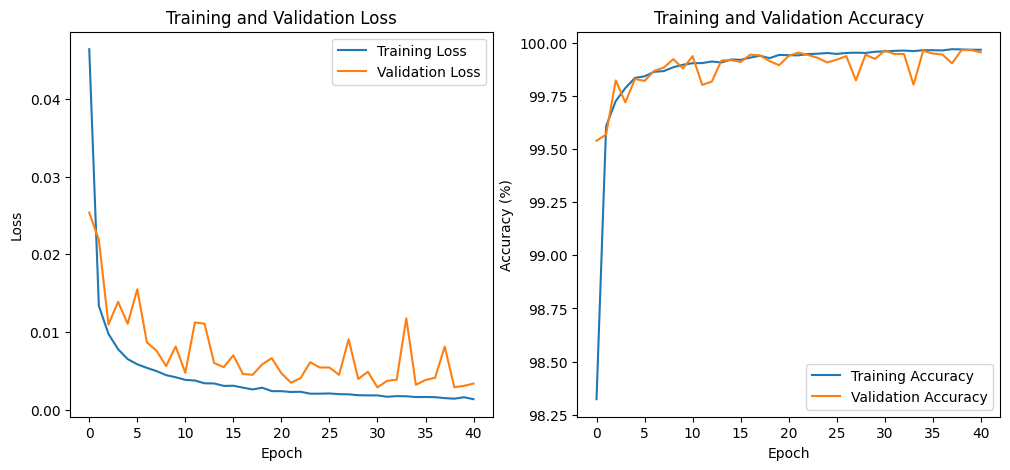

In [10]:
# Plotting the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

In [13]:
# Evaluation on test set
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate evaluation metrics
y_true = np.array(y_true).flatten()
y_pred = np.array(y_pred).flatten()

accuracy = accuracy_score(y_true, y_pred)
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")
print(f"Test ROC-AUC: {roc_auc:.4f}")

Test Accuracy: 0.9991
Test Precision: 0.6833
Test Recall: 0.8367
Test F1-score: 0.7523
Test ROC-AUC: 0.9180


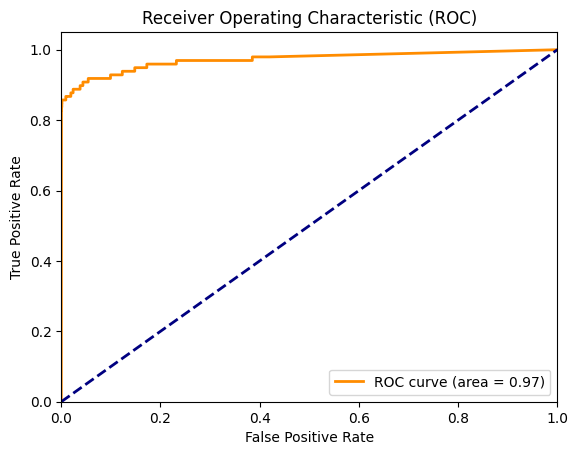

In [12]:
from sklearn.metrics import roc_curve, auc
# Evaluation on test set
model.eval()
y_true = []
y_pred_proba = []  # Store probabilities instead of binary predictions
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        y_true.extend(labels.cpu().numpy())
        y_pred_proba.extend(outputs.cpu().numpy())

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [14]:
import pickle
import joblib

# Save the model using pickle
filename_pickle = 'fraud_model.pkl'
with open(filename_pickle, 'wb') as file:
  pickle.dump(model, file)

# Save the model using joblib
filename_joblib = 'fraud_model.joblib'
joblib.dump(model, filename_joblib)

['fraud_model.joblib']